# CA1 Data Preparation

### Student - Linika Almeida, ID - 2023045
### Lais Ameno, ID - 2023101
### Eduardo , ID - 2023077

### DESCRIPTION 

The dataset was collected in the kaggle website.
This data provides information about people who have or not had a heart stroke and some information about risk factors that may contribute to this disease.
Using the information at hand, we attempt to comprehend how various clinical characteristics and risk factors affect the incidence of heart attacks. Clinical characteristics and risk factors include diabetes prevalence, gender, age, cholesterol, glucose, BMI, and smoking frequency.

##### Main Goal
Improve health outcomes and reduce health care coast for the company and prevent any eventual dispends with patients that have heart disease conditions.
______________________
For this purpose we are going to apply three different classification models: KNN, SVM, Random Forest. This coice was made due:
* KNN - Due to its ability to cluster similar data together, is able to recognize patterns in data pertaining to risk factors that result in strokes. It can demonstrate how clients with risk indicators are similar to one another and assist in locating comparable clients, allowing insurance plans to be customized.

* SVM - divides clients into distinct risk classes in a linear fashion according to risk variables. Additionally, it clearly delineates the limit between clients at high and low risk.

* Random Forest - is capable of deciphering intricate patterns and recognizing clients with peculiar traits that might pose an uncommon risk. able to identify the traits that are most important in predicting the likelihood of a stroke and aids in determining the overall risk connected to various client profiles.

#### The meaning of each column in the data is as below

    1. Gender: The gender of the patient
    2. Age: The age of the patient
    3. Education: The studies of the patient
    4. currentSmoker: The patient is a current smoker? (No = 0, Yes = 1)
    5. cigsPerDay: Quantity of cigarretes that the patient smokes each day
    6. BPMeds: The patient use blood pressure medication? (No = 0, Yes = 1)
    7. prevalentStroke: The patient had a stroke recently? (No = 0, Yes = 1)
    8. prevalentHyp: The patient had hypertension problems recently? (No = 0, Yes = 1)
    9. diabetes: The patient have diabetes? (No = 0, Yes = 1)
    10. totChol: Total of cholesterol of the patient
    11. sysBP: Systolic blood pressure of the patient
    12. diaBP: Diastolic blood pressure of the patient
    13. BMI: Body mass index of the patient
    14. heartRate: Heart rate of the patient
    15. glucose: Glucose of patient
    16. Heart_stroke: The patient will have a heart_stroke? (No = 0, Yes = 1)
    
  ##### * Target Variable: heart_stroke
___
    
Github Repository: https://github.com/linikaalmeida2023/Strategic-Thinking

#### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy.stats import f_oneway

#https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb
import dtreeviz
from yellowbrick.model_selection import FeatureImportances
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#Libraries for Saving the Model
from pickle import dump
from pickle import load

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from yellowbrick.classifier import (ConfusionMatrix, ROCAUC, ClassificationReport,
ClassPredictionError, ClassBalance)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set() 

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV 
import numpy as np
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

from scipy.stats import shapiro
import statsmodels.api as sm

In [2]:
# Read dataset
df = pd.read_csv("heart_disease.csv")

In [3]:
#!pip install -U imbalanced-learn

### EXPLORATORY DATA ANALYSIS (EDA)

In the EDA we are going to do some assumptions, do a comprehension of the dataset and check missing values

In [4]:
#Display the first few rows
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


Lets check some information in this dataset

In [5]:
#Display the summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [6]:
#Display the data type of the data
df.dtypes

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
dtype: object

In [7]:
#Show the number of missing (NaN values) per column
print(df.isnull().sum())

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64


In [8]:
#Show number of unique values per column
df.nunique()

Gender                2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
Heart_ stroke         2
dtype: int64

##### In a previous analyse is possible to notice:

In data.info we can see in this dataset is distributed in 4238 entries and 16 columns. And there are data with different type, being float64(8), int64(4), object(4).

In df.type we observed there are float (cigsPerDay,BPMeds, totChol, sysBP, diaBP, BMI, heartRate, glucose), int64 (age, currentSmoker, prevalentHyp, diabetes), object (Gender, education, prevalentStroke, Heart_ stroke).

isnull().sum() shows the columns education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose presents considerable number of missing values in this dataset.

It is also possible to see in df.nunuque() this dataset is not in balance, considering the columns do not have the same number of information.

For this project the column education is not relevant, we are goint to deleate it.
___

We are going to separate our categorical, binomial and continuous columns. 
We do this proccess to prepare it type of data before perform the models and also to normalise them.

#### Now we are going to investigate the dataset to get some insigts
* Make some plots
* Check Correlation


Let us check the number of Heart stroke vs. non-Heart stroke cases in the data set

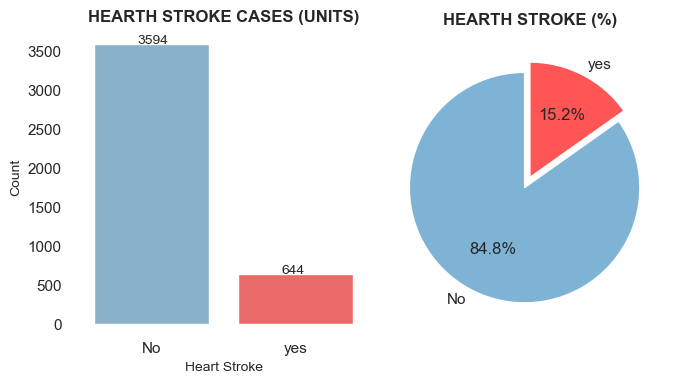

In [9]:
# Set white background
sns.set_style("whitegrid")

# Define colors
colors = ['#7FB3D5', '#FF5555']
sns.set_palette(colors)

# Figure with two plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
fig.patch.set_facecolor('white')  # Set background color for the figure

# Plot for Heart Stroke Cases
ax1 = sns.countplot(x="Heart_ stroke", data=df, order=df['Heart_ stroke'].value_counts().index, ax=axes[0])
#, width=0.7)
ax1.set_title('HEARTH STROKE CASES (UNITS)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Heart Stroke', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.grid(False)

# Remove border around the bar plot
for spine in ax1.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.30, p.get_height() + 8), fontsize=10)

# Plot Pie chart with percentual for Heart Stroke
ax2 = plt.subplot(1, 2, 2)
df['Heart_ stroke'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax2, startangle=90, explode=(0.1, 0))
ax2.set_title('HEARTH STROKE (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('')

# Set background color for the subplot
ax2.set_facecolor('white')

# Show plot
plt.tight_layout()
plt.show()

In the graphic above the number of patients that did not have a heart stroke is 84.8% it is way greater comparated with patients that had a hearth stroke 15.2%. 

In this plot is also possible to observe our column is imbalance, considering there is a relevant difference between the number of cases and it might bring some inconsistence when apply the models. 

We are going to add some synthetic data in our training to balance our target variable

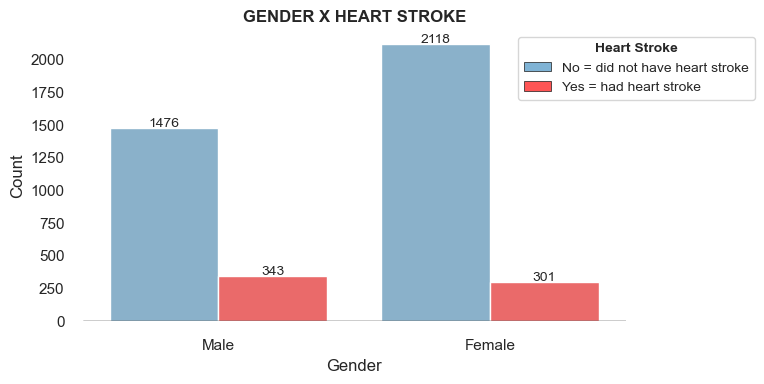

In [10]:
# Set white background
sns.set_style("whitegrid")

# Define colors
colors = ['#7FB3D5', '#FF5555']
sns.set_palette(colors)

# Bar chart for Gender vs Heart Stroke
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Gender', hue='Heart_ stroke', data=df)
#, width=0.7)  
ax.set_title('GENDER X HEART STROKE', fontsize=12, fontweight='bold')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Add a line from y-axis to x-axis
plt.axhline(0, color='black', linewidth=1)

# Remove borders and grid
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 8),
                ha='center', fontsize=10)

# Create a legend 
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, ec="k", lw=0.5, label=label) for color, label in zip(colors, ['No = did not have heart stroke', 'Yes = had heart stroke'])]
legend = plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1), title='Heart Stroke', fontsize=10, frameon=True, facecolor='white')
legend.set_title('Heart Stroke', prop={'size': 10, 'weight': 'bold'})

# Adjust layout 
plt.tight_layout()
plt.show()

The plot above demonstrate there are more Male cases of hearth stroke being 343 case versus 301 cases for women

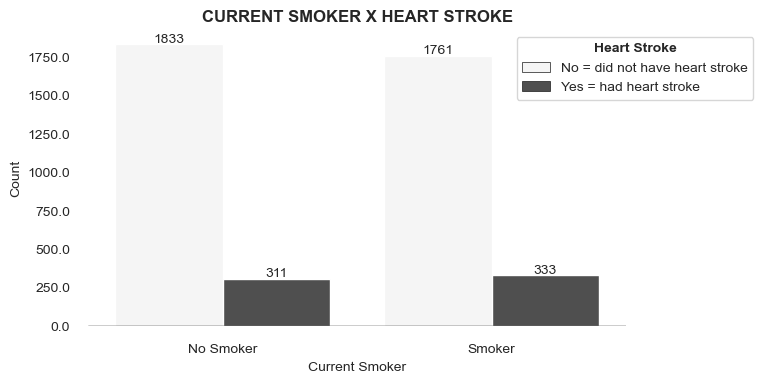

In [11]:
# Define colors
colors = ['#F5F5F5', '#4F4F4F']
sns.set_palette(colors)

# Bar chart for Smoking vs Heart Stroke
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='currentSmoker', hue='Heart_ stroke', data=df)
#, width=0.7)  
ax.set_title('CURRENT SMOKER X HEART STROKE', fontsize=12, fontweight='bold')
ax.set_xlabel('Current Smoker', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

# Add a line from y-axis to x-axis
plt.axhline(0, color='black', linewidth=1)

# Remove borders and grid
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 8),
                ha='center', fontsize=10)

# Create a legend 
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, ec="k", lw=0.5, label=label) for color, 
                  label in zip(colors, ['No = did not have heart stroke', 'Yes = had heart stroke'])]
legend = plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1), 
                    title='Heart Stroke', fontsize=10, frameon=True, facecolor='white')
legend.set_title('Heart Stroke', prop={'size': 10, 'weight': 'bold'})

# Replace labels
ax.set_xticklabels(['No Smoker', 'Smoker'], fontsize=10)
ax.set_yticklabels(ax.get_yticks(), fontsize=10)  # Set font size for y-axis labels

# Adjust layout 
plt.tight_layout()
plt.show()

In this plot show the number of heart stroke for No smoker and Smoker, there is slightly different between them which people that had the habit of smoke were more susceptible to have hearth stroke being 333 cases of heart stroke versos 311 case for no smokers

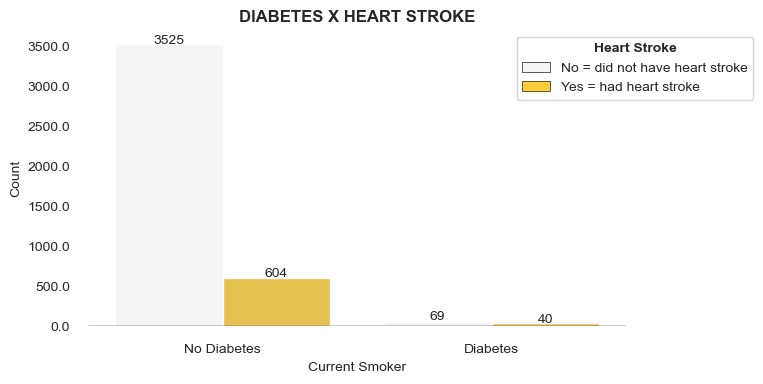

In [12]:
# Define colors
colors = ['#F5F5F5', '#FFCE38']
sns.set_palette(colors)

# Bar chart for Smoking vs Heart Stroke
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='diabetes', hue='Heart_ stroke', data=df)
#, width=0.7)  
ax.set_title('DIABETES X HEART STROKE', fontsize=12, fontweight='bold')
ax.set_xlabel('Current Smoker', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

# Add a line from y-axis to x-axis
plt.axhline(0, color='black', linewidth=1)

# Remove borders and grid
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 8),
                ha='center', fontsize=10)

# Create a legend 
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, ec="k", lw=0.5, label=label) for color, 
                  label in zip(colors, ['No = did not have heart stroke', 'Yes = had heart stroke'])]
legend = plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1), 
                    title='Heart Stroke', fontsize=10, frameon=True, facecolor='white')
legend.set_title('Heart Stroke', prop={'size': 10, 'weight': 'bold'})

# Replace labels
ax.set_xticklabels(['No Diabetes', 'Diabetes'], fontsize=10)
ax.set_yticklabels(ax.get_yticks(), fontsize=10)  # Set font size for y-axis labels

# Adjust layout 
plt.tight_layout()
plt.show()

Patients which did not have diabetes had a hight level of heart stroke, and almost all of the patients that have diabetes are more likeable to get a heart strokePatients which did not have diabetes had a hight level of heart stroke, and almost all of the patients that have diabetes are more likeable to get a heart stroke

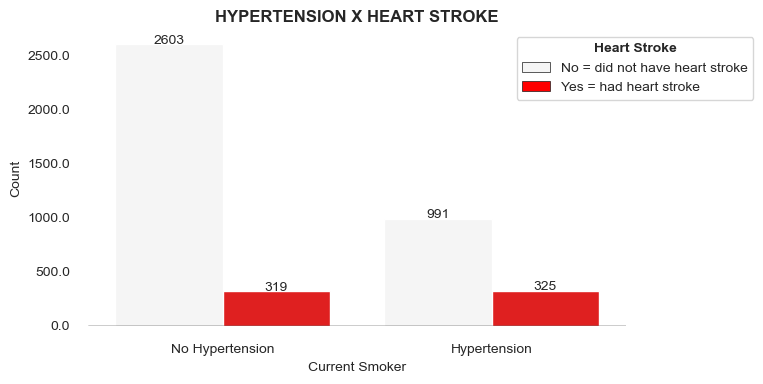

In [13]:
# Define colors
colors = ['#F5F5F5', '#FF0000']
sns.set_palette(colors)

# Bar chart for Smoking vs Heart Stroke
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='prevalentHyp', hue='Heart_ stroke', data=df)
                   #, width=0.7)  
ax.set_title('HYPERTENSION X HEART STROKE', fontsize=12, fontweight='bold')
ax.set_xlabel('Current Smoker', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

# Add a line from y-axis to x-axis
plt.axhline(0, color='black', linewidth=1)

# Remove borders and grid
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Display the count values on the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 8),
                ha='center', fontsize=10)

# Create a legend 
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, ec="k", lw=0.5, label=label) for color, 
                  label in zip(colors, ['No = did not have heart stroke', 'Yes = had heart stroke'])]
legend = plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.25, 1), 
                    title='Heart Stroke', fontsize=10, frameon=True, facecolor='white')
legend.set_title('Heart Stroke', prop={'size': 10, 'weight': 'bold'})

# Replace labels
ax.set_xticklabels(['No Hypertension', 'Hypertension'], fontsize=10)
ax.set_yticklabels(ax.get_yticks(), fontsize=10)  # Set font size for y-axis labels

# Adjust layout 
plt.tight_layout()
plt.show()

The number of patients without hypertension are greater, but it seems that having hypertension might contribute for heart stroke. Is similar to diabetes vs heart stroke.

#### ______________________________________________________________________________________________________________

##### * Correlation

We are going to check the Person Correlation for the continuous data to understand the strength and direction of the linear relationship between pairs of continuous variables

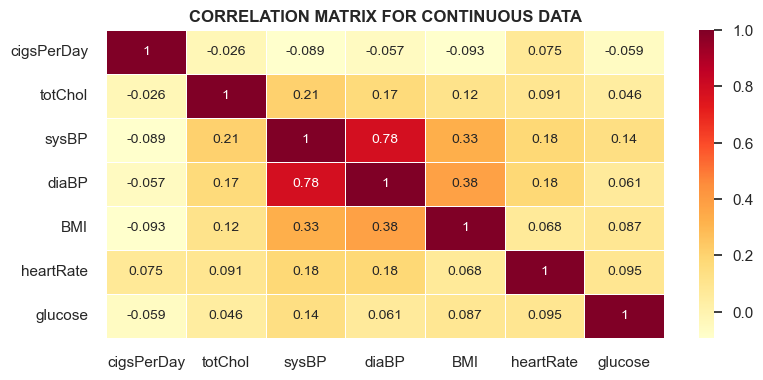

In [14]:
# Correlation between continuous data
data = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df_continuos = pd.DataFrame(data)
continuous_columns = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

#Correlation Matrix
correlation_matrix = df[continuous_columns].corr()

# Plot Heatmap
plt.figure(figsize=(9, 4))
cmap = sns.color_palette("YlOrRd", as_cmap=True)
annot_font_size = 10
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidths=0.5, annot_kws={"size": annot_font_size})
plt.title('CORRELATION MATRIX FOR CONTINUOUS DATA', fontsize=12, fontweight='bold')
plt.show()

We can observe diaBP and sysBP are highter correlated

#### ______________________________________________________________________________________________________________

### DATA PREPROCESSING

Taking the time of ready the csv file, we found that they were some values with 'NA', this means we need to replace those values with NaN values.

In [15]:
#Define NA as missing values NAN
missing_value_formats = ["NA"]
df = pd.read_csv("heart_disease.csv", na_values = missing_value_formats)

In [16]:
#Check the overall structure in this dataset
print('Number of records (rows) in the dataset are:', df.shape[0])
print('Number of features (columns) in the dataset are:', df.shape[1])
print('Number of values in the dataset are:', df.count().sum())
print('Number missing values in the dataset are:', sum(df.isna().sum()))

Number of records (rows) in the dataset are: 4238
Number of features (columns) in the dataset are: 16
Number of values in the dataset are: 67163
Number missing values in the dataset are: 645


According to our analsysis so far, it seems our dataset contains 540 null values in total. We will proceed to determine how many null values are by column

In [17]:
#Check NA per column
pd.isna(df).sum()[pd.isna(df).sum() > 0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

The NA are distributed in the columns cigsPerDay (continuous data), BPMeds (continuous data), totChol (continuous data), BMI (continuous data), heartRate (object), glucose (continuous data)

Before replacing null values, I will check my dataset plot to see how it looks. This will help us determine which option to choose from mode, median and mean to replace our nulls. I'm applying this only to my numeric data.

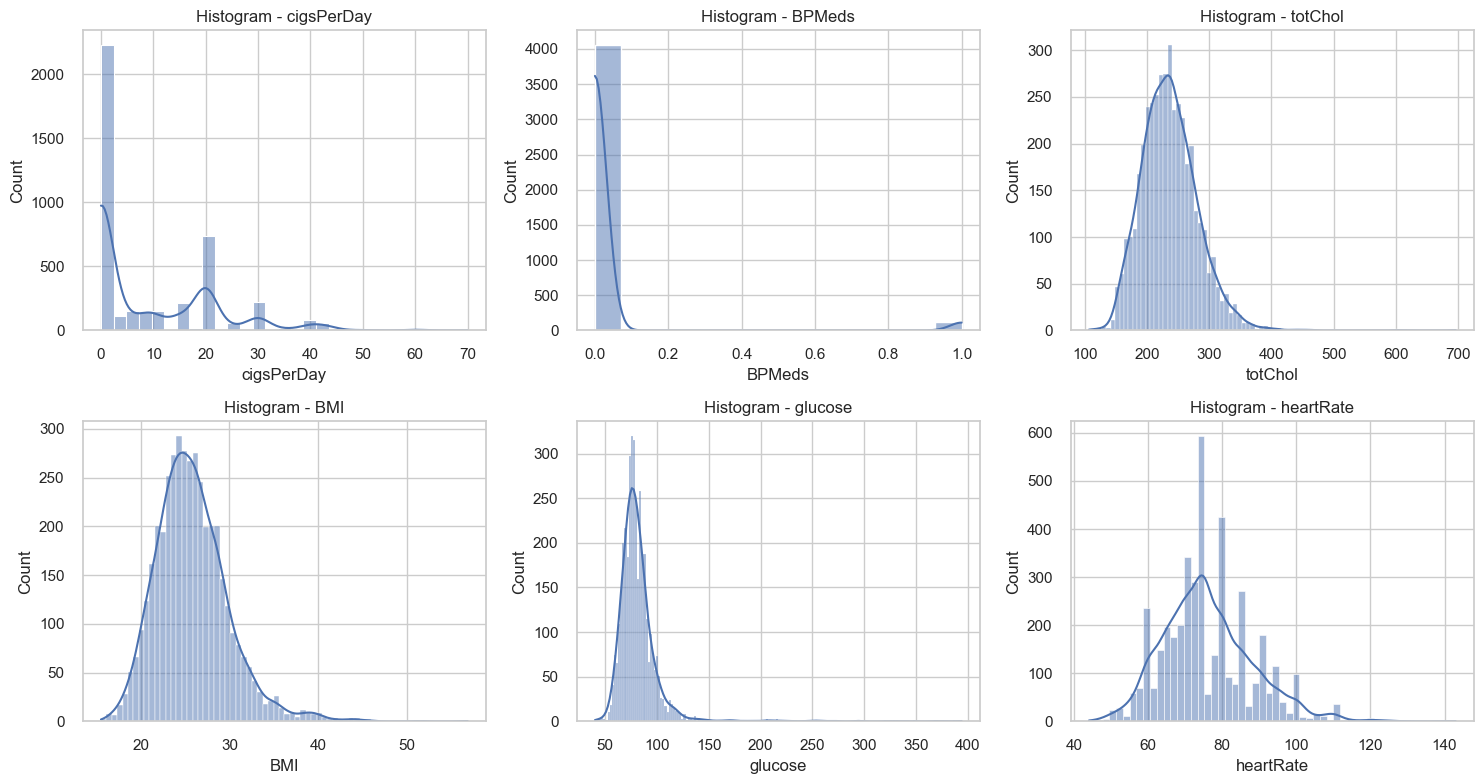

In [18]:
#Plot histogram to visualize how the data is distribuited

columns_NaN = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']
sns.set(style="whitegrid")

# Plot each column
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes 
axes = axes.flatten()

# Loop over columns with missing values
for i, column in enumerate(columns_NaN):
    # Histogram
    sns.histplot(df[column], ax=axes[i], kde=True)
    
    # Add title
    axes[i].set_title(f'Histogram - {column}')

# Layout
plt.tight_layout()
plt.show()

This visualization shows three columns have histogram exhibiting a bell-shaped and other two with a skewness shape. 
For data with bell-shaped the method to fill NA gonna be Mean. 

And for the columns with skewness shape we are going to fill null values with median.

With my categorical columns, I will proceed to fill the nulls with the mode of each column.

In [19]:
#Fill missing vallues
columns_to_fill_mean = ['cigsPerDay', 'totChol', 'glucose', 'heartRate']
columns_to_fill_median = ['BPMeds', 'BMI']

# Fill missing values with mean for specified columns
for column in columns_to_fill_mean:
    df[column].fillna(df[column].mean(), inplace=True)

# Fill missing values with median for specified columns
for column in columns_to_fill_median:
    df[column].fillna(df[column].median(), inplace=True)

The column "education" will be remved once it do not make a any difference for the heart disease analyse

In [20]:
# Deleting Education from the dataset
uselessColumns = ['education']
df.drop(columns = uselessColumns, axis = 1, inplace = True)

In [21]:
#Check if there is any missing values
pd.isna(df).sum()[pd.isna(df).sum() > 0]

Series([], dtype: int64)

_______
The dataset have continuous data, binomial data and categorical data. We are going to:
1. Separate the data conform the datatype (for normalization the continuous data)
2. Apply hot ecoding to organize all the dataset in a numerical format before perform the models

##### 1. Separate the datatype

In [22]:
# Separate categorical, binomial, and continuous data
categoricalColumns = df[['Gender', 'prevalentStroke', 'Heart_ stroke']]

continuousColumns = df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

binomialColumns = df[['currentSmoker', 'BPMeds', 'prevalentHyp', 'diabetes']]  

#### 2. Hot ecoding to transform categorical data in binomial data

In [23]:
#Check the categorical column
print(categoricalColumns)

      Gender prevalentStroke Heart_ stroke
0       Male              no            No
1     Female              no            No
2       Male              no            No
3     Female              no           yes
4     Female              no            No
...      ...             ...           ...
4233    Male              no           yes
4234    Male              no            No
4235  Female              no            No
4236  Female              no            No
4237  Female              no            No

[4238 rows x 3 columns]


We are going to transform the categorical columns in binary data.
It avoid misinterpretations, unwanted weightings and it is more compatibility with the model we are going to perform.

k-NN: calcule the separation between two points, so this binary encoding makes distance calculations more efficient.
SVM: the hyperplane separation plane is found. The binary representation makes it easier to define distinct decision margins.
Random Forest: is made up of decision trees where in each, the binary representation is more appropriate for decision making.

In [24]:
# Apply hot ecoding to convert categorical data in a binary data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder ()

for i in categoricalColumns:
    categoricalColumns[i] = LE.fit_transform(df[i])

In [25]:
# Check the categorical column after hot ecoding
categoricalColumns.head()

,Gender,prevalentStroke,Heart_ stroke
0,1,0,0
1,0,0,0
2,1,0,0
3,0,0,1
4,0,0,0


After treating the data types separately, we will now join them into a single data

In [26]:
#Join the dataset
completeDataset = pd.concat([categoricalColumns, continuousColumns, binomialColumns], axis=1)
completeDataset.head(5)

,Gender,prevalentStroke,Heart_ stroke,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,currentSmoker,BPMeds,prevalentHyp,diabetes
0,1,0,0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,0.0,0,0
1,0,0,0,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,0.0,0,0
2,1,0,0,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,1,0.0,0,0
3,0,0,1,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,0.0,1,0
4,0,0,0,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,1,0.0,0,0


#### ______________________________________________________________________________________________________________

#### * Normality Test

The dataset there are binary data and continuous data. We gonna check if our continnuous data is normal applying the Shapiro-Wilk Test. We chose this test because it is usuful for moderate size of data 

In [27]:
binary_column= ['Gender', 'prevalentStroke', 'Heart_ stroke', 'currentSmoker', 'BPMeds', 'prevalentHyp', 'diabetes']
continuous_column = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

Column: age
Statistical Test: 0.9669737219810486
p Value: 3.923861080671942e-30
No normal distribution (the null hypothesis is rejected).


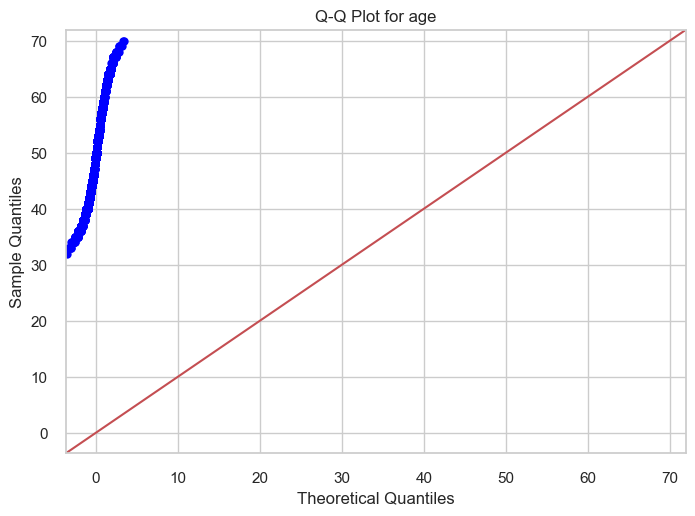

Column: cigsPerDay
Statistical Test: 0.7647703886032104
p Value: 0.0
No normal distribution (the null hypothesis is rejected).


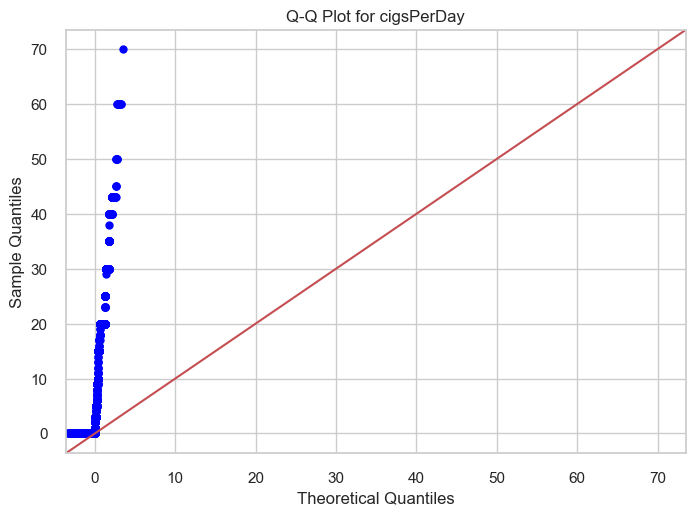

Column: BPMeds
Statistical Test: 0.15633225440979004
p Value: 0.0
No normal distribution (the null hypothesis is rejected).


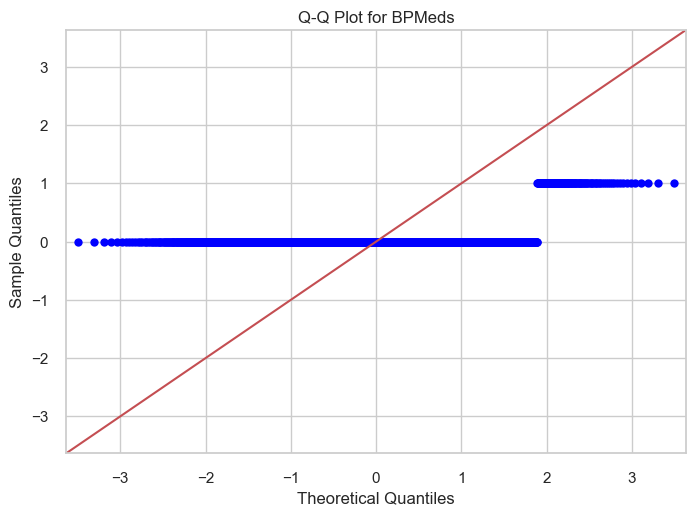

Column: totChol
Statistical Test: 0.968342661857605
p Value: 1.3794130170402233e-29
No normal distribution (the null hypothesis is rejected).


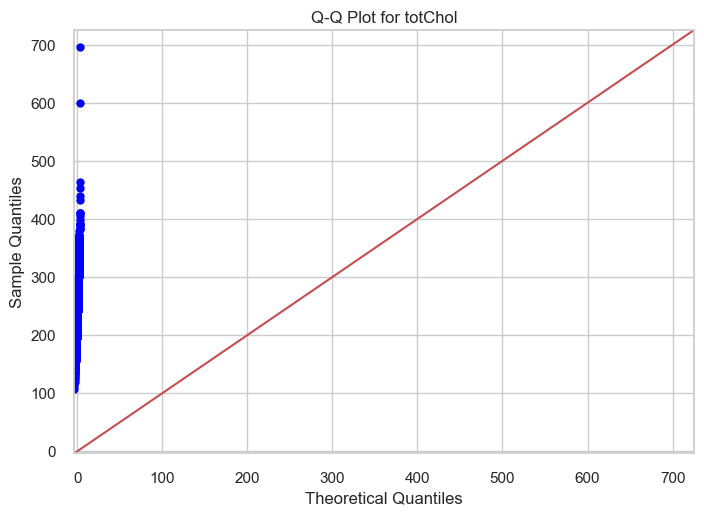

Column: sysBP
Statistical Test: 0.9352273941040039
p Value: 1.5775804098384147e-39
No normal distribution (the null hypothesis is rejected).


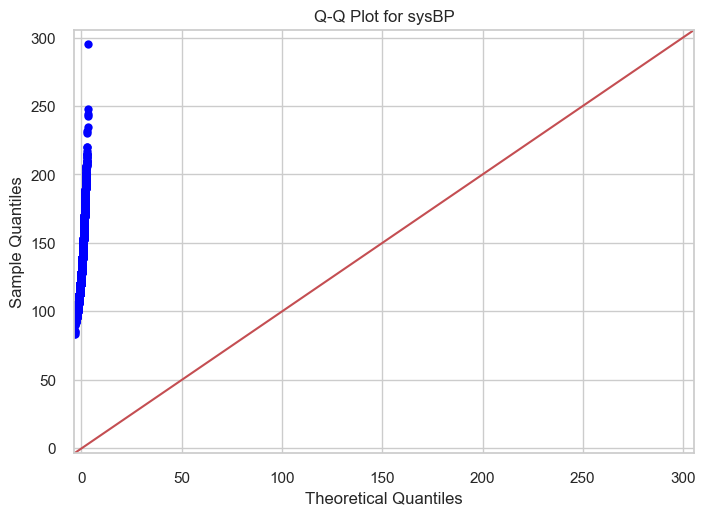

Column: diaBP
Statistical Test: 0.9736613035202026
p Value: 2.8233237427292738e-27
No normal distribution (the null hypothesis is rejected).


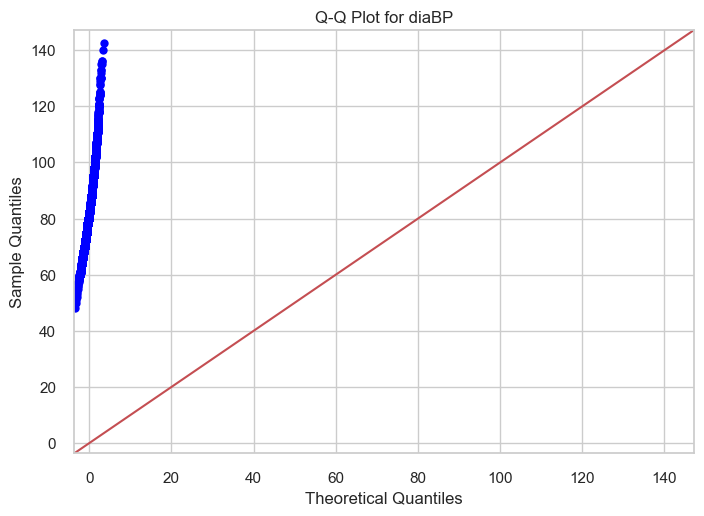

Column: BMI
Statistical Test: 0.957336962223053
p Value: 1.5118694061497777e-33
No normal distribution (the null hypothesis is rejected).


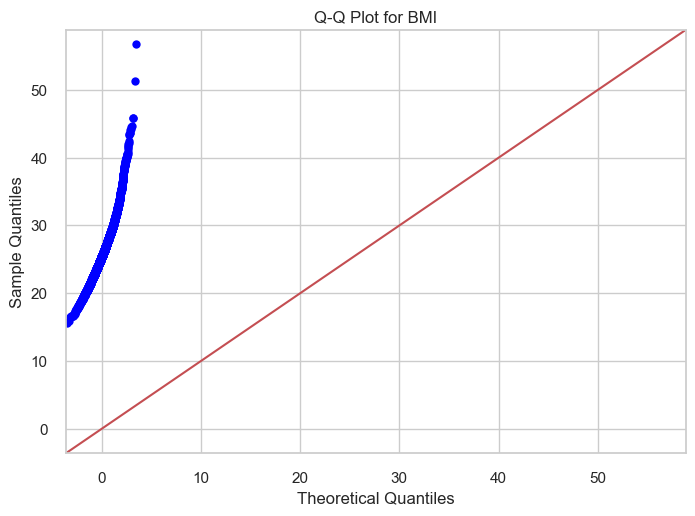

Column: heartRate
Statistical Test: 0.97459876537323
p Value: 7.841937606681793e-27
No normal distribution (the null hypothesis is rejected).


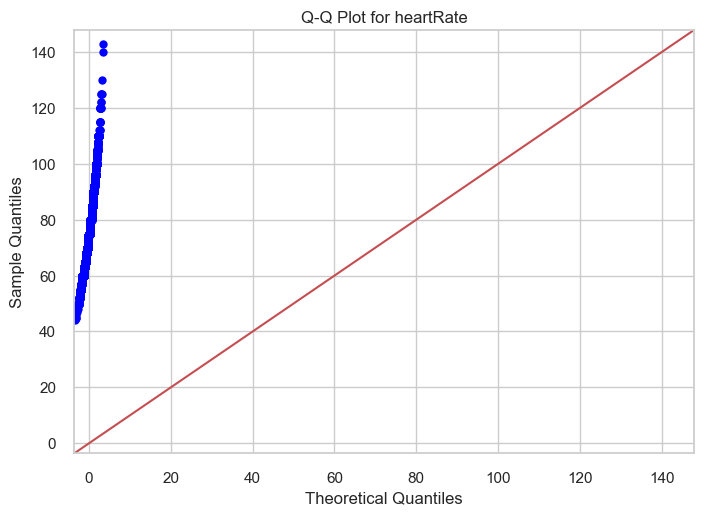

Column: glucose
Statistical Test: 0.5522358417510986
p Value: 0.0
No normal distribution (the null hypothesis is rejected).


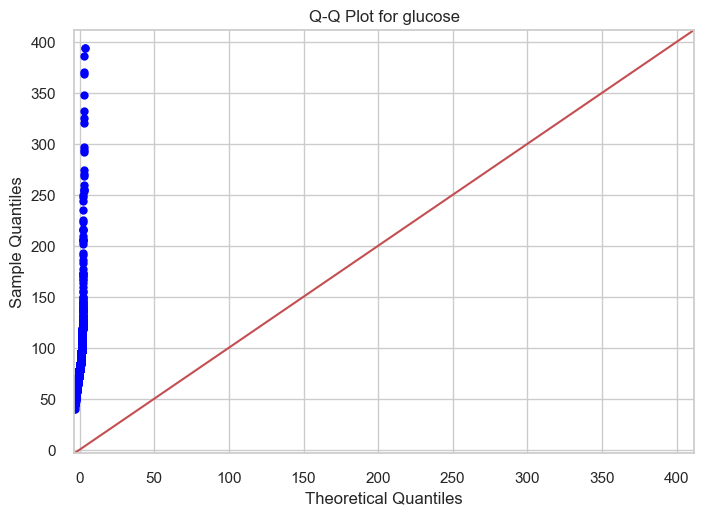

In [28]:
# Columns to check normality
continuous_column = ['age', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Apply Shapiro-Wilk Test and create Q-Q plots
for column in continuous_column:
    data = df[column]
    
    # Apply Shapiro-Wilk Test
    result = shapiro(data)
    
    # Result statistical and p-value
    statistical_test, p_value = result
    
    # Print results
    print(f"Column: {column}")
    print(f"Statistical Test: {statistical_test}")
    print(f"p Value: {p_value}")

    # Define level of significance
    level_significance = 0.05  
    if p_value > level_significance:
        print("Normal distribution (do not reject null hypothesis).")
    else:
        print("No normal distribution (the null hypothesis is rejected).")

     # Create Q-Q plot 
    sm.qqplot(data, line='45', markerfacecolor='blue') 
    plt.title(f'Q-Q Plot for {column}')
    plt.show()

After apply Shapiro-Wilker Test the continuos data demonstrate do not have normality considering the p value is < 0.05, that was the level of significance defined for this test.

For the purpose to give more stability in our modeling we are going to try to normalise the data applying Logaritmical transformation

##### Logaritmical transformation to normalise the data

Result for cigsPerDay after logarithmic transformation:
Statistical Test: 0.7599417567253113
P-Value: 0.0
Result for totChol after logarithmic transformation:
Statistical Test: 0.9968982338905334
P-Value: 1.1638425689852738e-07
Result for sysBP after logarithmic transformation:
Statistical Test: 0.9786430597305298
P-Value: 9.205942668980659e-25
Result for diaBP after logarithmic transformation:
Statistical Test: 0.995639979839325
P-Value: 6.812700958924722e-10
Result for BMI after logarithmic transformation:
Statistical Test: 0.9920635223388672
P-Value: 1.2361227831798362e-14
Result for heartRate after logarithmic transformation:
Statistical Test: 0.9943292140960693
P-Value: 7.602335427847606e-12
Result for glucose after logarithmic transformation:
Statistical Test: 0.8403283953666687
P-Value: 0.0


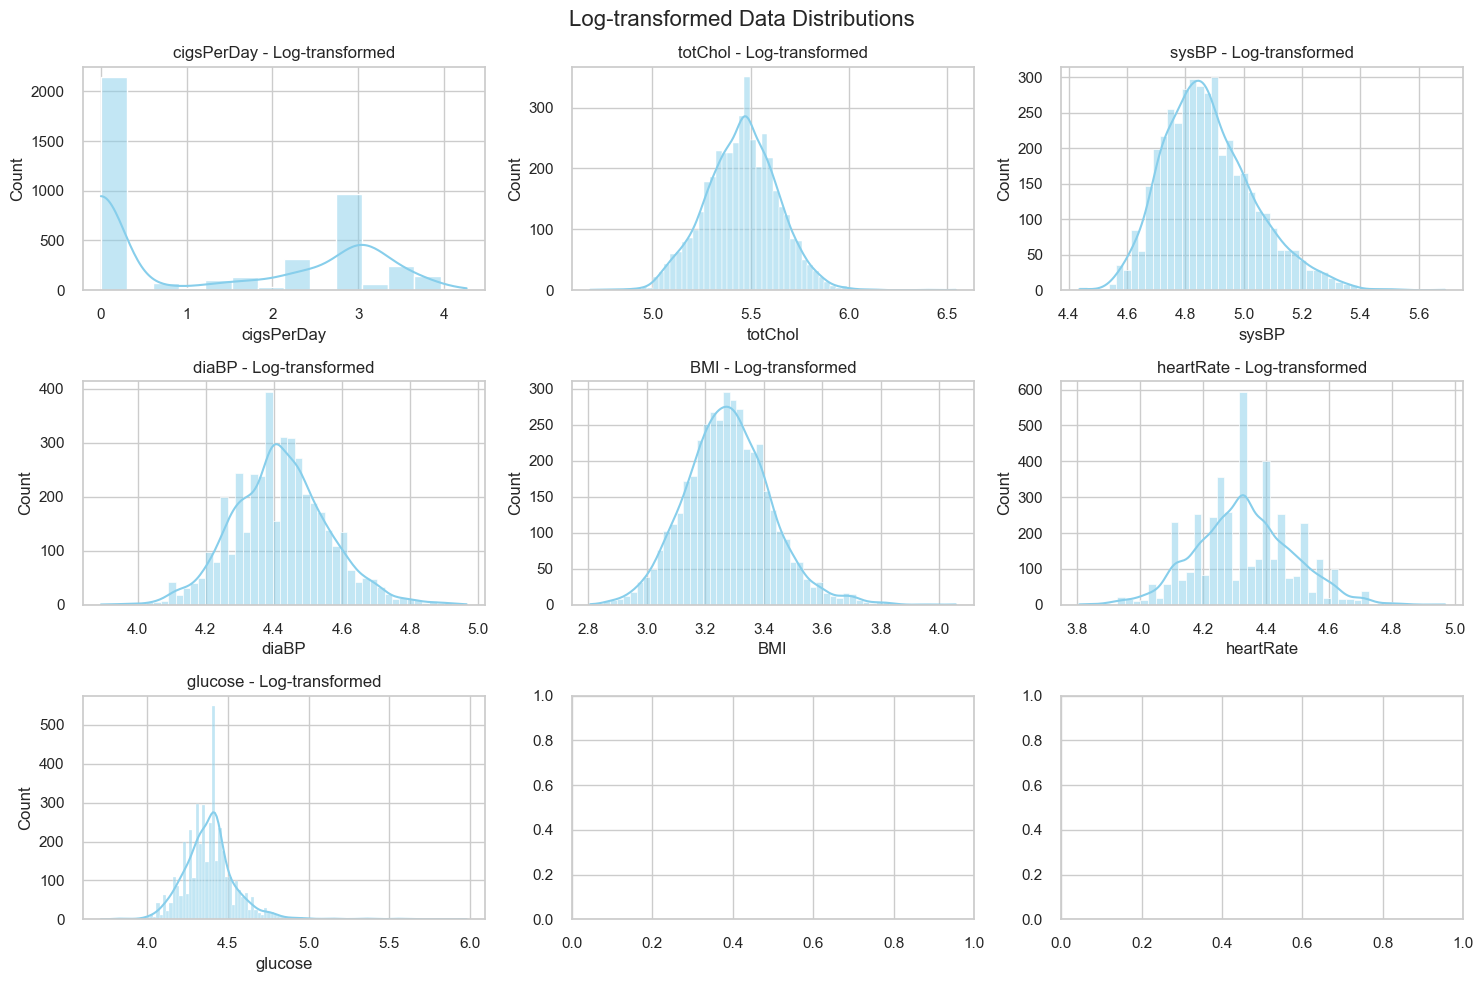

In [29]:
# List of continuous variables
continuous_columns = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Apply logarithmic transformation for each variable
for column in continuous_columns:
    df[f'{column}_log'] = np.log1p(df[column])  

# Check normality 
for column in continuous_columns:
    # Result after log
    result_log = shapiro(df[f'{column}_log'])
    print(f"Result for {column} after logarithmic transformation:")
    print(f"Statistical Test: {result_log.statistic}")
    print(f"P-Value: {result_log.pvalue}")
    
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Log-transformed Data Distributions', fontsize=16)
axes = axes.flatten()

for i, column in enumerate(continuous_columns):
    # Apply log transformation (adding 1 to avoid log(0))
    transformed_data = np.log1p(df[column])
    
    # Plot the histogram
    sns.histplot(transformed_data, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column} - Log-transformed')

# Adjust layout
plt.tight_layout()
plt.show()

Log transformations were applied, and it was found that the data was not normal. Since these transformations did not achieve the desired normal distribution, we plan to utilize MinMaxScaler. MinMaxScaler will scaling the data put it to a range between 0 and 1. It is usufull for adjust the data but not necessary normalise them. This step is taken to prepare the data for algorithms that are sensitive to feature scales

#### _____________________________________________________________________________________________________________

#### Feature Selection

We will use SelectKBest, which is a feature selection technique employed in machine learning tasks. It assesses the relevance of features with respect to the target variable and selects the best features.

In [30]:
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(k=10)
bestfeatures
Y= completeDataset["Heart_ stroke"]
X = completeDataset.loc[:, completeDataset.columns != 'Heart_ stroke']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs       Score
2            age  226.424830
5          sysBP  208.171803
12  prevalentHyp  137.966856
6          diaBP   91.358454
9        glucose   62.315684
13      diabetes   40.500615
0         Gender   33.384171
11        BPMeds   31.872136
4        totChol   28.411616
7            BMI   23.461568


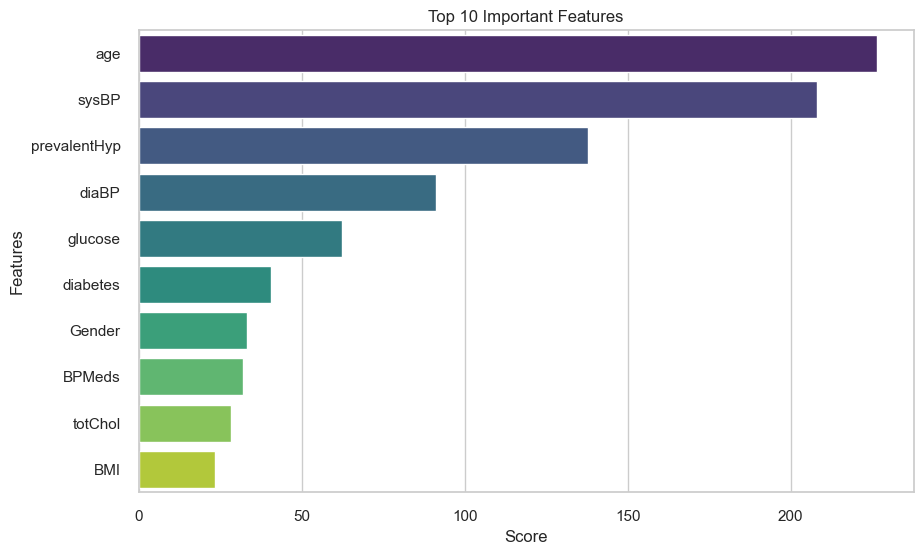

In [31]:
# Checking the top 10 features
top_10_features = featureScores.nlargest(10, 'Score')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Specs', data=top_10_features, palette="viridis")
plt.title('Top 10 Important Features')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

The 'age' and 'sysBP' columns have the highest scores; however, the decision on which features to keep depends on various factors, such as the model's objective, the interpretability of features, and the possibility of overfitting.

We could keep the top five most important features by selecting the ones with the highest scores. Still, we're taking into account the context of the business problem. Likely, features that don't have the highest scores may be crucial for the interpretability or relevance of the model, given that we're dealing with a dataset related to heart attacks. Considering this context, we'll retain all ten features.

### MODELING


#### Training data and machine learning models

We going to select some of classification algorithms to see how have the best performace

In [32]:
# Define the dependent variable 'Heart _stroke' and independent variables
# split out validation dataset for the end

y = completeDataset["Heart_ stroke"]

X = completeDataset.loc[:, ["age", "sysBP", "prevalentHyp", "diaBP", "glucose", 'diabetes','Gender','BPMeds', 'totChol','BMI']]

In [33]:
#Splitting data and train and test 70% training and 30% test
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)
scoring = 'accuracy'

In [34]:
# spot check some basic Classification algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# #Neural Network
models.append(('NN', MLPClassifier()))
# # #Ensable Models 
# # Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# # Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [35]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), np.nanstd(cv_results))
    print(msg)

LR: 0.848284 (0.012238)
LDA: 0.846595 (0.012484)
KNN: 0.832436 (0.011554)
CART: 0.747490 (0.027213)
NB: 0.817935 (0.005320)
SVM: 0.847945 (0.014738)
NN: 0.842209 (0.008366)
AB: 0.841536 (0.016199)
GBM: 0.842881 (0.018018)
RF: 0.844235 (0.014218)
ET: 0.839852 (0.010504)


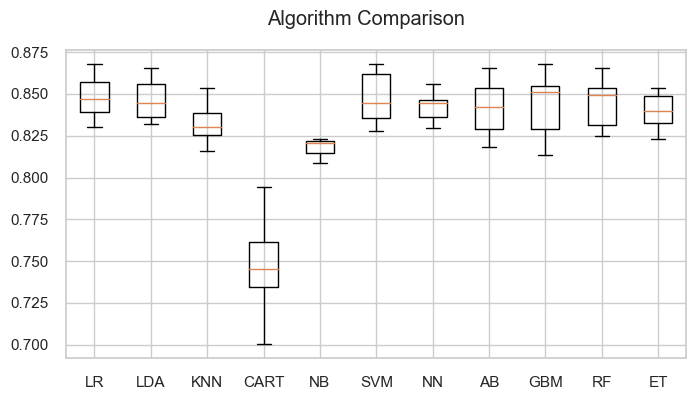

In [36]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

Given the SVM has the best recall out of all the models, it is used to ealuate the test set

## SVM Model with hyperparameter = 0.3

In [37]:
# Define the SVM  using rbf kernel, C=0, default value of gamma
svm_model = SVC(C = 0.3, kernel='rbf')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Making predictions
y_pred = svm_model.predict(X_validation)
svm_acc = accuracy_score(y_validation, y_pred)
print(f"SVM accuracy: {svm_acc:.3f}")

SVM accuracy: 0.852


In [38]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_validation
predictions = svm_model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.8522012578616353
[[1084    0]
 [ 188    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.00      0.00      0.00       188

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.78      1272



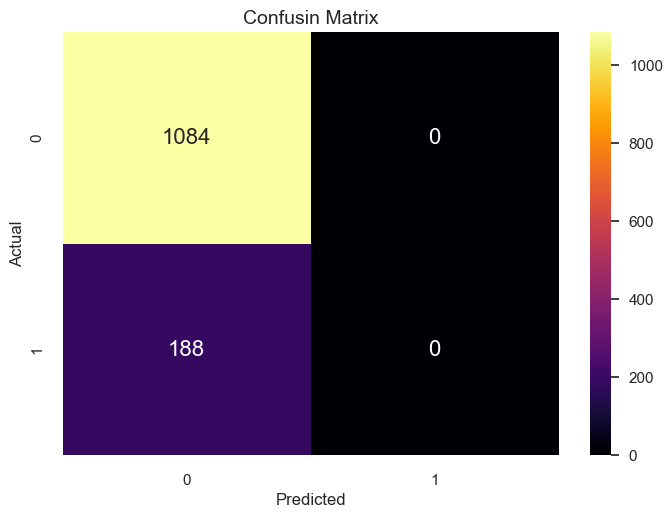

In [39]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap='inferno', annot=True,annot_kws={"size": 16}, fmt='g');
plt.title('Confusin Matrix', fontsize=14);

## SVM Model with hyperparameter = 1

In [40]:
# Define the SVM  using rbf kernel, C=1, default value of gamma
svm_model = SVC(C = 1, kernel='rbf')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Making predictions
y_pred = svm_model.predict(X_validation)
svm_acc = accuracy_score(y_validation, y_pred)
print(f"SVM accuracy: {svm_acc:.3f}")

SVM accuracy: 0.851


In [41]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_validation
predictions = svm_model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.8514150943396226
[[1081    3]
 [ 186    2]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1084
           1       0.40      0.01      0.02       188

    accuracy                           0.85      1272
   macro avg       0.63      0.50      0.47      1272
weighted avg       0.79      0.85      0.79      1272



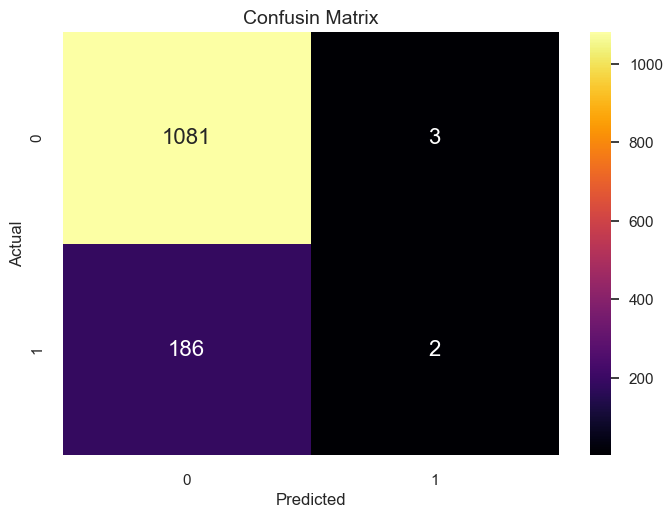

In [42]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap='inferno', annot=True,annot_kws={"size": 16}, fmt='g');
plt.title('Confusin Matrix', fontsize=14);

The model seems to perform well in predicting class 0.3 (negative cases) but poorly in predicting class 1 (positive cases). The low recall for class 1 indicates that the model is missing a significant number of actual positive instances. The F1-score for class 1 is also very low, suggesting that the model struggles to balance precision and recall for the positive class.

#### Model Tuning for balancing the sample by Random Under Sampling

We've chosen to adopt undersampling, which aims to balance the two classes by reducing the class with more samples, which in our project is Class 0 (Not Heart Stroke).

In [43]:
df = pd.concat([X_train, y_train], axis=1)
# who had Heart stroke 644 vs. who had not 3594.
Heart_stroke_yes = df.loc[df['Heart_ stroke'] == 1]
Heart_stroke_No = df.loc[df['Heart_ stroke'] == 0][:Heart_stroke_yes.shape[0]]

normal_distributed_df = pd.concat([Heart_stroke_yes, Heart_stroke_No])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
Y_train_new = df_new['Heart_ stroke']
X_train_new = df_new.loc[:, df.columns != 'Heart_ stroke']

completeDataset.head() 


,Gender,prevalentStroke,Heart_ stroke,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,currentSmoker,BPMeds,prevalentHyp,diabetes
0,1,0,0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,0.0,0,0
1,0,0,0,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0,0.0,0,0
2,1,0,0,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,1,0.0,0,0
3,0,0,1,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,0.0,1,0
4,0,0,0,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,1,0.0,0,0


In [44]:
df_new['Heart_ stroke'].unique()

array([0, 1])

Distribution of the Heart stroke in the subsample dataset
Heart_ stroke
0    0.5
1    0.5
Name: count, dtype: float64


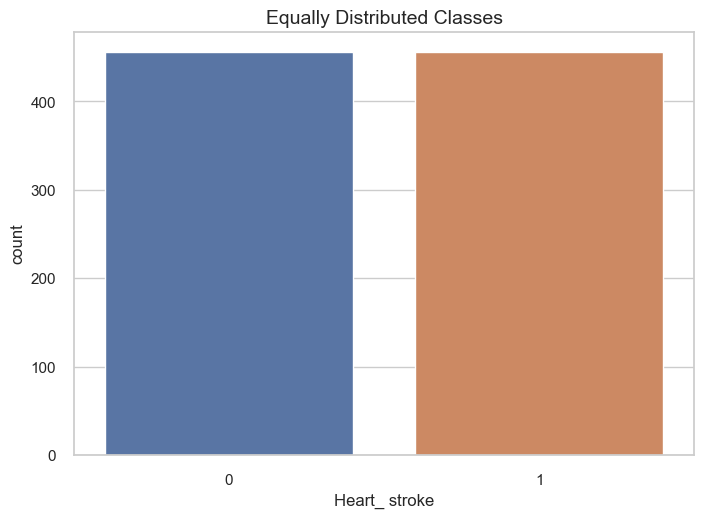

In [45]:
print('Distribution of the Heart stroke in the subsample dataset')
print(df_new['Heart_ stroke'].value_counts() / len(df_new))
sns.countplot(x='Heart_ stroke', data=df_new)
plt.title('Equally Distributed Classes', fontsize=14);
plt.show();

Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

### Training Models

We going to run again the classification models to verify which one has the best accuracy

In [46]:
scoring='accuracy'

In [47]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Neural Network
models.append(('NN', MLPClassifier()))
# #Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [48]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_new, Y_train_new,
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.640416 (0.056253)
LDA: 0.655708 (0.047349)
KNN: 0.589858 (0.040654)
CART: 0.590999 (0.036201)
NB: 0.599824 (0.033759)
SVM: 0.621710 (0.051650)
NN: 0.636020 (0.028239)
AB: 0.620611 (0.026558)
GBM: 0.632673 (0.034123)
RF: 0.634838 (0.048004)
ET: 0.634846 (0.040509)


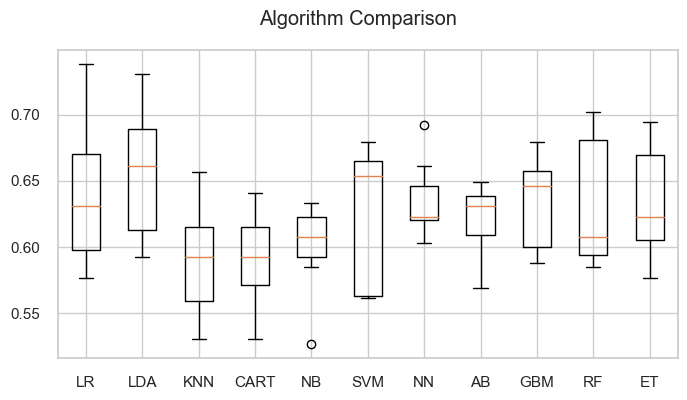

In [49]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

Given that LDA is the best model out of all the models we going to proceed with it.


## Linear discriminant analysis (LDA) 

Tuning the LDA model through grid search involves optimizing several key parameters. The choice of an appropriate solver is crucial for efficient computation, the application of a shrinkage method is employed to enhance model performance, determining the optimal number of components ensures effective dimensionality reduction, and setting the tolerance for convergence is essential for controlling the precision of the model during the optimization process.

In [50]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  # the appropriate solver
    'shrinkage': ['auto', None],  # the appropriate shrinkage method
    'n_components': [None, 1, 2, 3],  # Number of components to keep
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for convergence
}

model = LinearDiscriminantAnalysis()

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_new, Y_train_new)

# Results GridSearchCV
print("Best Parameters: ", grid_result.best_params_)
print("Best Score: ", grid_result.best_score_)

# Detailed results for each combination of hyperparameters
results = grid_result.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Score: {mean_score:.4f}, Parameters: {params}")

Best Parameters:  {'n_components': None, 'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}
Best Score:  0.6611945306601795
Mean Score: nan, Parameters: {'n_components': None, 'shrinkage': 'auto', 'solver': 'svd', 'tol': 0.0001}
Mean Score: nan, Parameters: {'n_components': None, 'shrinkage': 'auto', 'solver': 'svd', 'tol': 0.001}
Mean Score: nan, Parameters: {'n_components': None, 'shrinkage': 'auto', 'solver': 'svd', 'tol': 0.01}
Mean Score: 0.6612, Parameters: {'n_components': None, 'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}
Mean Score: 0.6612, Parameters: {'n_components': None, 'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001}
Mean Score: 0.6612, Parameters: {'n_components': None, 'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.01}
Mean Score: 0.6612, Parameters: {'n_components': None, 'shrinkage': 'auto', 'solver': 'eigen', 'tol': 0.0001}
Mean Score: 0.6612, Parameters: {'n_components': None, 'shrinkage': 'auto', 'solver': 'eigen', 'tol': 0.001}
Mean Score: 0.6612

The Best Parameters Score is 0.6611, we've picked: n_components': None, 'shrinkage': 'auto', 'solver': 'eigen', 'tol': 0.0001

In [51]:
# prepare model
model = LinearDiscriminantAnalysis(n_components= None, shrinkage= 'auto', solver='lsqr', tol=0.0001)
model.fit(X_train_new, Y_train_new)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

### Classification Report

In [52]:
# estimate accuracy on Original validation set
predictions = model.predict(X_validation)  
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.6611635220125787
[[714 370]
 [ 61 127]]
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1084
           1       0.26      0.68      0.37       188

    accuracy                           0.66      1272
   macro avg       0.59      0.67      0.57      1272
weighted avg       0.82      0.66      0.71      1272



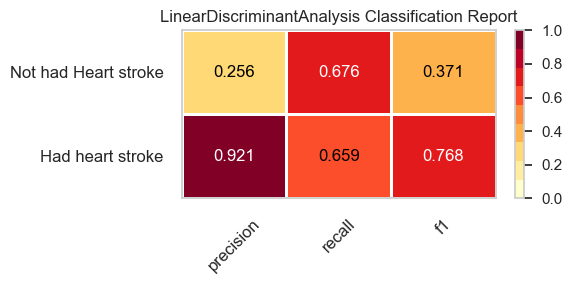

In [53]:
fig, ax = plt.subplots(figsize=(6, 3))
cm_viz = ClassificationReport(model,
    classes=["Had heart stroke", "Not had Heart stroke"],
    label_encoder=df_cm,)
cm_viz.score(X_validation, y_validation);
cm_viz.poof();

The precision for Class 1 is relatively low, indicating that many positive predictions for Class 1 are incorrect. The F1-score is moderateinfluenced by the imbalance in the classes, however The recall metrics for both classes are similar, indicating that the model is not favoring one specific class over the other.

### Confusion Matrix

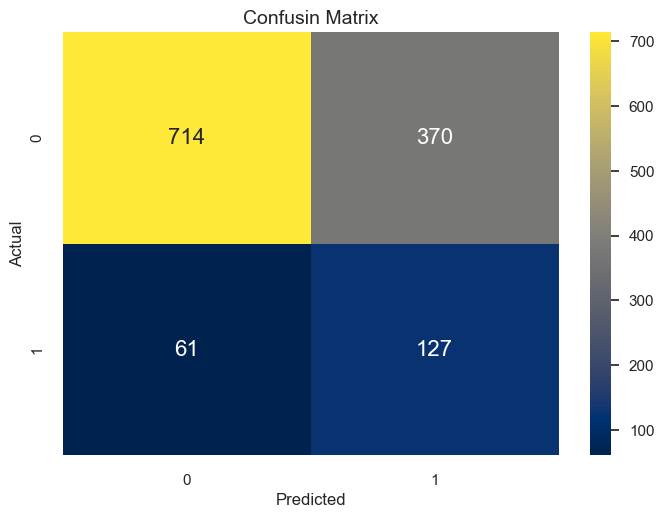

In [54]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions),
                     columns=np.unique(y_validation),
                     index=np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap='cividis', annot=True, annot_kws={"size": 16}, fmt='g');
plt.title('Confusin Matrix', fontsize=14);

In [55]:
pd.DataFrame(confusion_matrix(y_validation, model.predict(X_validation)),
    columns=["Predict Heart Stroke", "Predict Not_Heart Stroke"],
    index=["True Not heart Stroke", "True Heart Stroke"],)

,Predict Heart Stroke,Predict Not_Heart Stroke
True Not heart Stroke,714,370
True Heart Stroke,61,127


True Positive (TP): 127 (Predicted as 1 and is actually 1).
True Negative (TN): 714 (Predicted as 0 and is actually 0).
False Positive (FP): 370 (Predicted as 1, but is actually 0).
False Negative (FN): 61 (Predicted as 0, but is actually 1).

#### Class Prediction Error

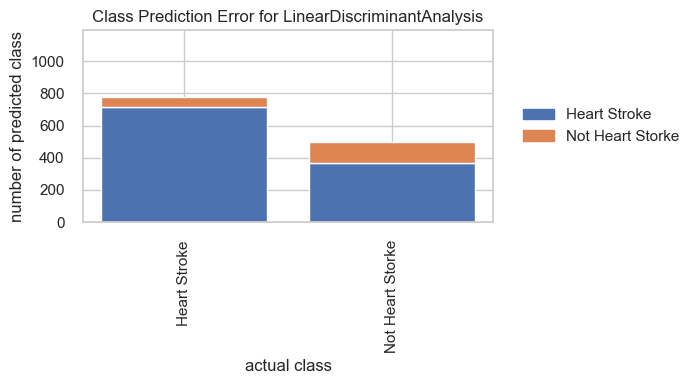

In [56]:
fig, ax = plt.subplots(figsize=(8, 4))
cpe_viz = ClassPredictionError(
    model, classes=["Heart Stroke", "Not Heart Storke"])

cpe_viz.score(X_validation, y_validation);
cpe_viz.poof();

#### ROC AUC

We will continue to assess the model's performance across classes using ROC AUC to understand the rate of false positives in relation to the rate of true positives at different cutoff points.

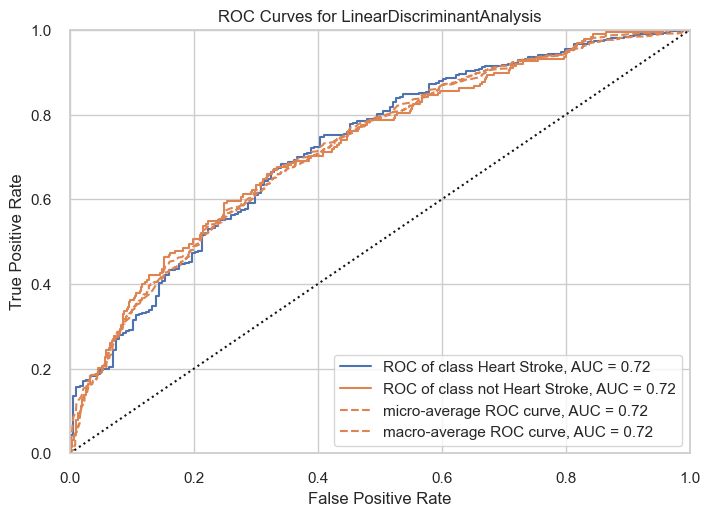

In [57]:
visualizer = ROCAUC(model, classes=["Heart Stroke", "not Heart Stroke"])

visualizer.fit(X_train_new, Y_train_new)        # Fit the training data to the visualizer
visualizer.score(X_validation, y_validation)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and show the figure

A value of 0.72 suggests that the model has a moderate ability to discriminate between classes but still need improvements

#### SHAP

We will continue to apply to SHAP library. SHAP is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions. We are using this in order to explain the relation between the variables. We know that in order to use SHAP, we need a tree-based machine learning. We will proceed to apply the random forest classifier and then apply SHAP.

In [58]:
y = completeDataset["Heart_ stroke"]

X = completeDataset.drop(columns=['Heart_ stroke'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_pred = rf.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8667452830188679


In [75]:
#conda install python-graphviz

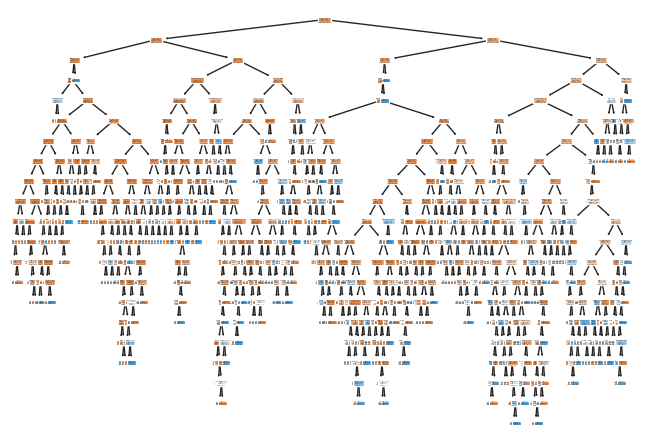

In [63]:
from sklearn import tree
forest = tree.plot_tree(rf.estimators_[0], feature_names= X.columns.tolist(), filled=True)

In [64]:
rf.estimators_[0].tree_.max_depth

20

We can observe that the max deep of our random forest is 21, with this number we just can't understand what the data is telling us. We will proceed to decrease our depth of the random forest to 3 to be able to understand it.

In [65]:
rf_3 = RandomForestClassifier(max_depth=3)
rf_3.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

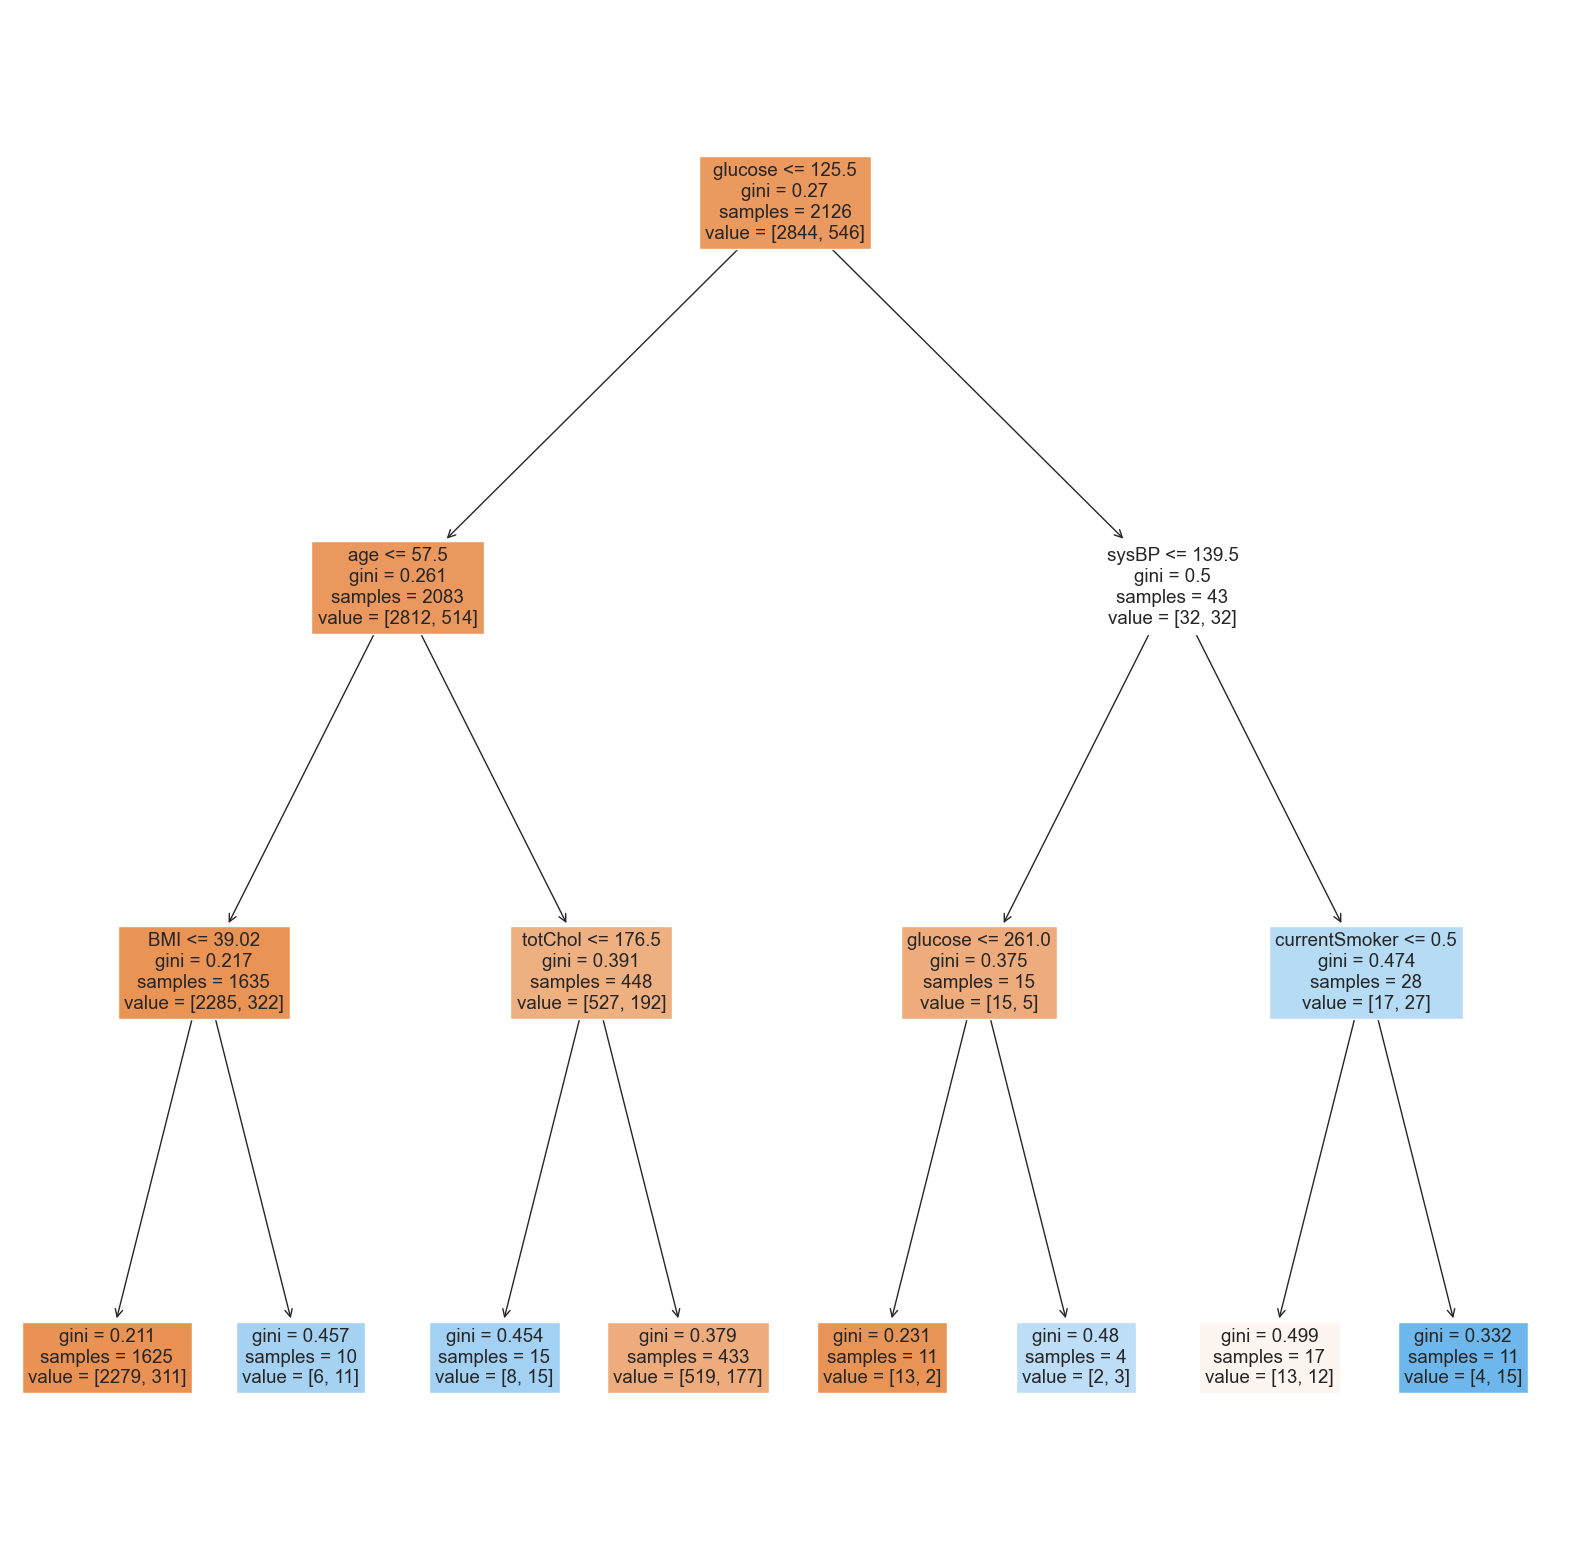

In [66]:
plt.figure(figsize=(20,20))
forest_3 = tree.plot_tree(rf_3.estimators_[0], feature_names=X.columns.tolist(), filled=True)

Now we are able to see the results of our random forest. Having this done, we will proceed to see the SHAP values of our model.

In [76]:
#!pip install shap

In [70]:
import shap
# Fits the explainer
explainer = shap.Explainer(rf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 849it [13:38,  1.03it/s]                         


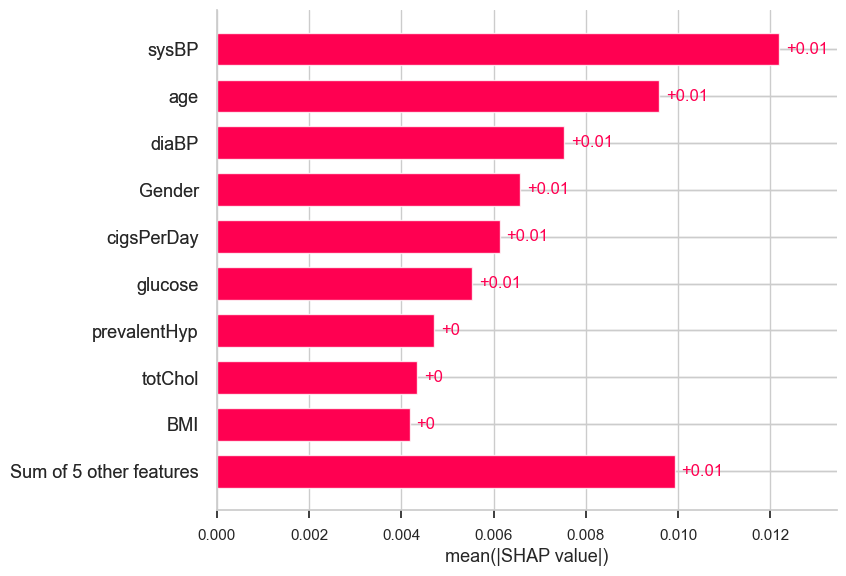

In [71]:
shap.plots.bar(shap_values)

Here the features are ordered from the highest to the lowest effect on the prediction. It takes in account the absolute SHAP value, so it does not matter if the feature affects the prediction in a positive or negative way.

As we notice, SHAP values gives us a different order for our most importance features. Using SHAP we find that the glucose have the most impact in our features, meanwhile using feature selection the most importan is age.

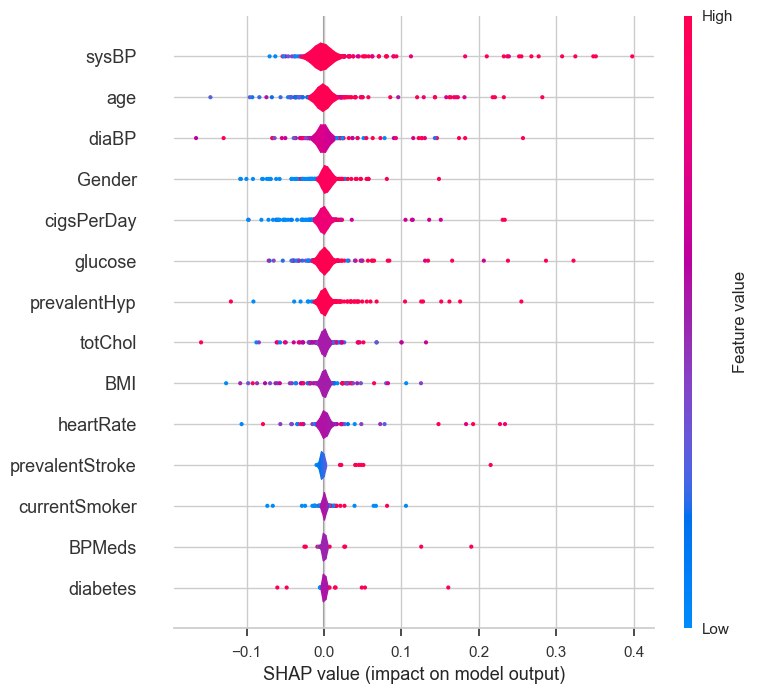

In [72]:
shap.summary_plot(shap_values, plot_type='violin')

With this violin plot, we can see how the features affect our predictions. In this case we can see how the feature prevalentStroke, which is the last one who affects the predictions, have a low impact in the red color. This means that even tho have something to add, its not really that important to affect our predictions. On the other hand, if we look at glucose or age, we might be able to understand it better.

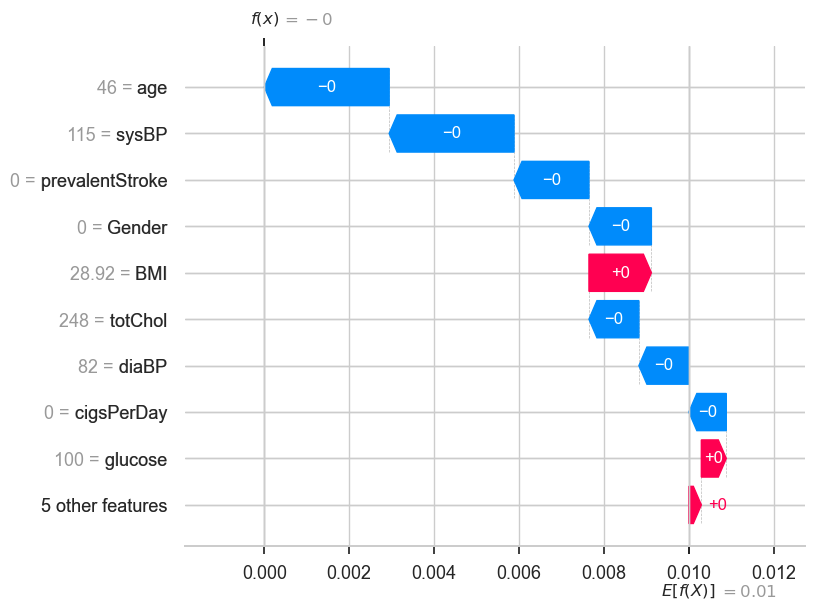

In [73]:
shap.plots.waterfall(shap_values[0])

This plot shows us what are the main features affecting the prediction of a single observation, and the magnitude of the SHAP value for each feature. This is the impact our features have on 'shap_values[0]'. This is only 1 value, let's try to see how it affect other value.

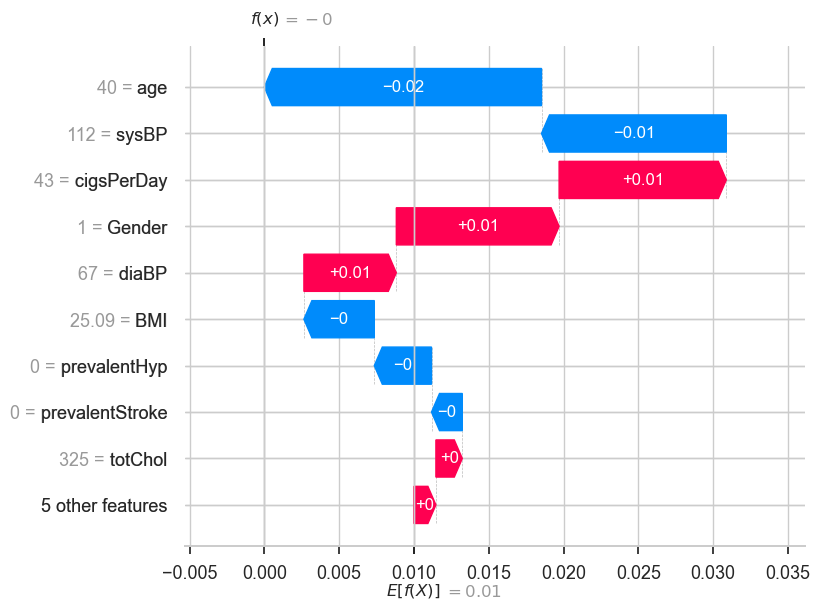

In [74]:
shap.plots.waterfall(shap_values[20])

#### Why is important to use SHAP?

SHAP importance is measured at row level. It represents how a feature influences the prediction of a single row relative to the other features in that row and to the average outcome in the dataset.